In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

cmap = mpl.cm.viridis

In [120]:
PATH = "electromigration_18/ET7_spectrum_"
# N_RANGE = (1, 62)
# files = [PATH + '{0:03}.dat'.format(i) for i in range(*N_RANGE)]
# filenums = np.arange(61, 0, -5)
filenums = np.arange(5, 65, 10)
files = [PATH + '{0:03}.dat'.format(i) for i in filenums]
volts = np.arange(-60, 0, 10)
norm = mpl.colors.Normalize(vmin=min(volts), vmax=max(volts))


In [121]:
data_file = files[0]
with open(data_file,'r') as f:
    for i in range(70): # 70 for .dat, 8 for transport__.dat
        f.readline()
#         next(f) # skip first row
    df = pd.read_table(f)
#     df = pd.DataFrame(l.rstrip().split() for l in f)
#     df = df.astype('float64')
# sns.lineplot('Bias calc (V)', 'LI Y [AVG] (V)', data=df, label=height, lw=0.75)

In [122]:
df.head()

,Bias calc (V),Current [AVG] (A),LI X [AVG] (V),LI Y [AVG] (V),Current [00001] (A),LI X [00001] (V),LI Y [00001] (V),Current [00002] (A),LI X [00002] (V),LI Y [00002] (V),Current [00003] (A),LI X [00003] (V),LI Y [00003] (V)
0,1.000000,1.075200e-11,0.427429,0.011159,1.187690e-11,0.424316,0.010881,9.696050e-12,0.429465,0.013648,1.068300e-11,0.428507,0.008946
1,0.998043,1.117550e-11,0.431739,0.013583,1.237780e-11,0.437910,0.011596,1.107830e-11,0.429016,0.013624,1.007050e-11,0.428291,0.015530
2,0.996086,1.101140e-11,0.430866,0.011255,1.204170e-11,0.429968,0.005023,1.000580e-11,0.429688,0.015368,1.098650e-11,0.432944,0.013375
3,0.994129,1.118690e-11,0.426893,0.012088,1.276650e-11,0.425692,0.014721,1.091100e-11,0.426000,0.009507,9.883340e-12,0.428986,0.012037
4,0.992172,1.106890e-11,0.429826,0.011610,1.178880e-11,0.434880,0.002897,1.016270e-11,0.427595,0.017065,1.125510e-11,0.427002,0.014868


In [123]:
len(files)

6

In [124]:
import matplotlib
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

20
24
28
32
36
40


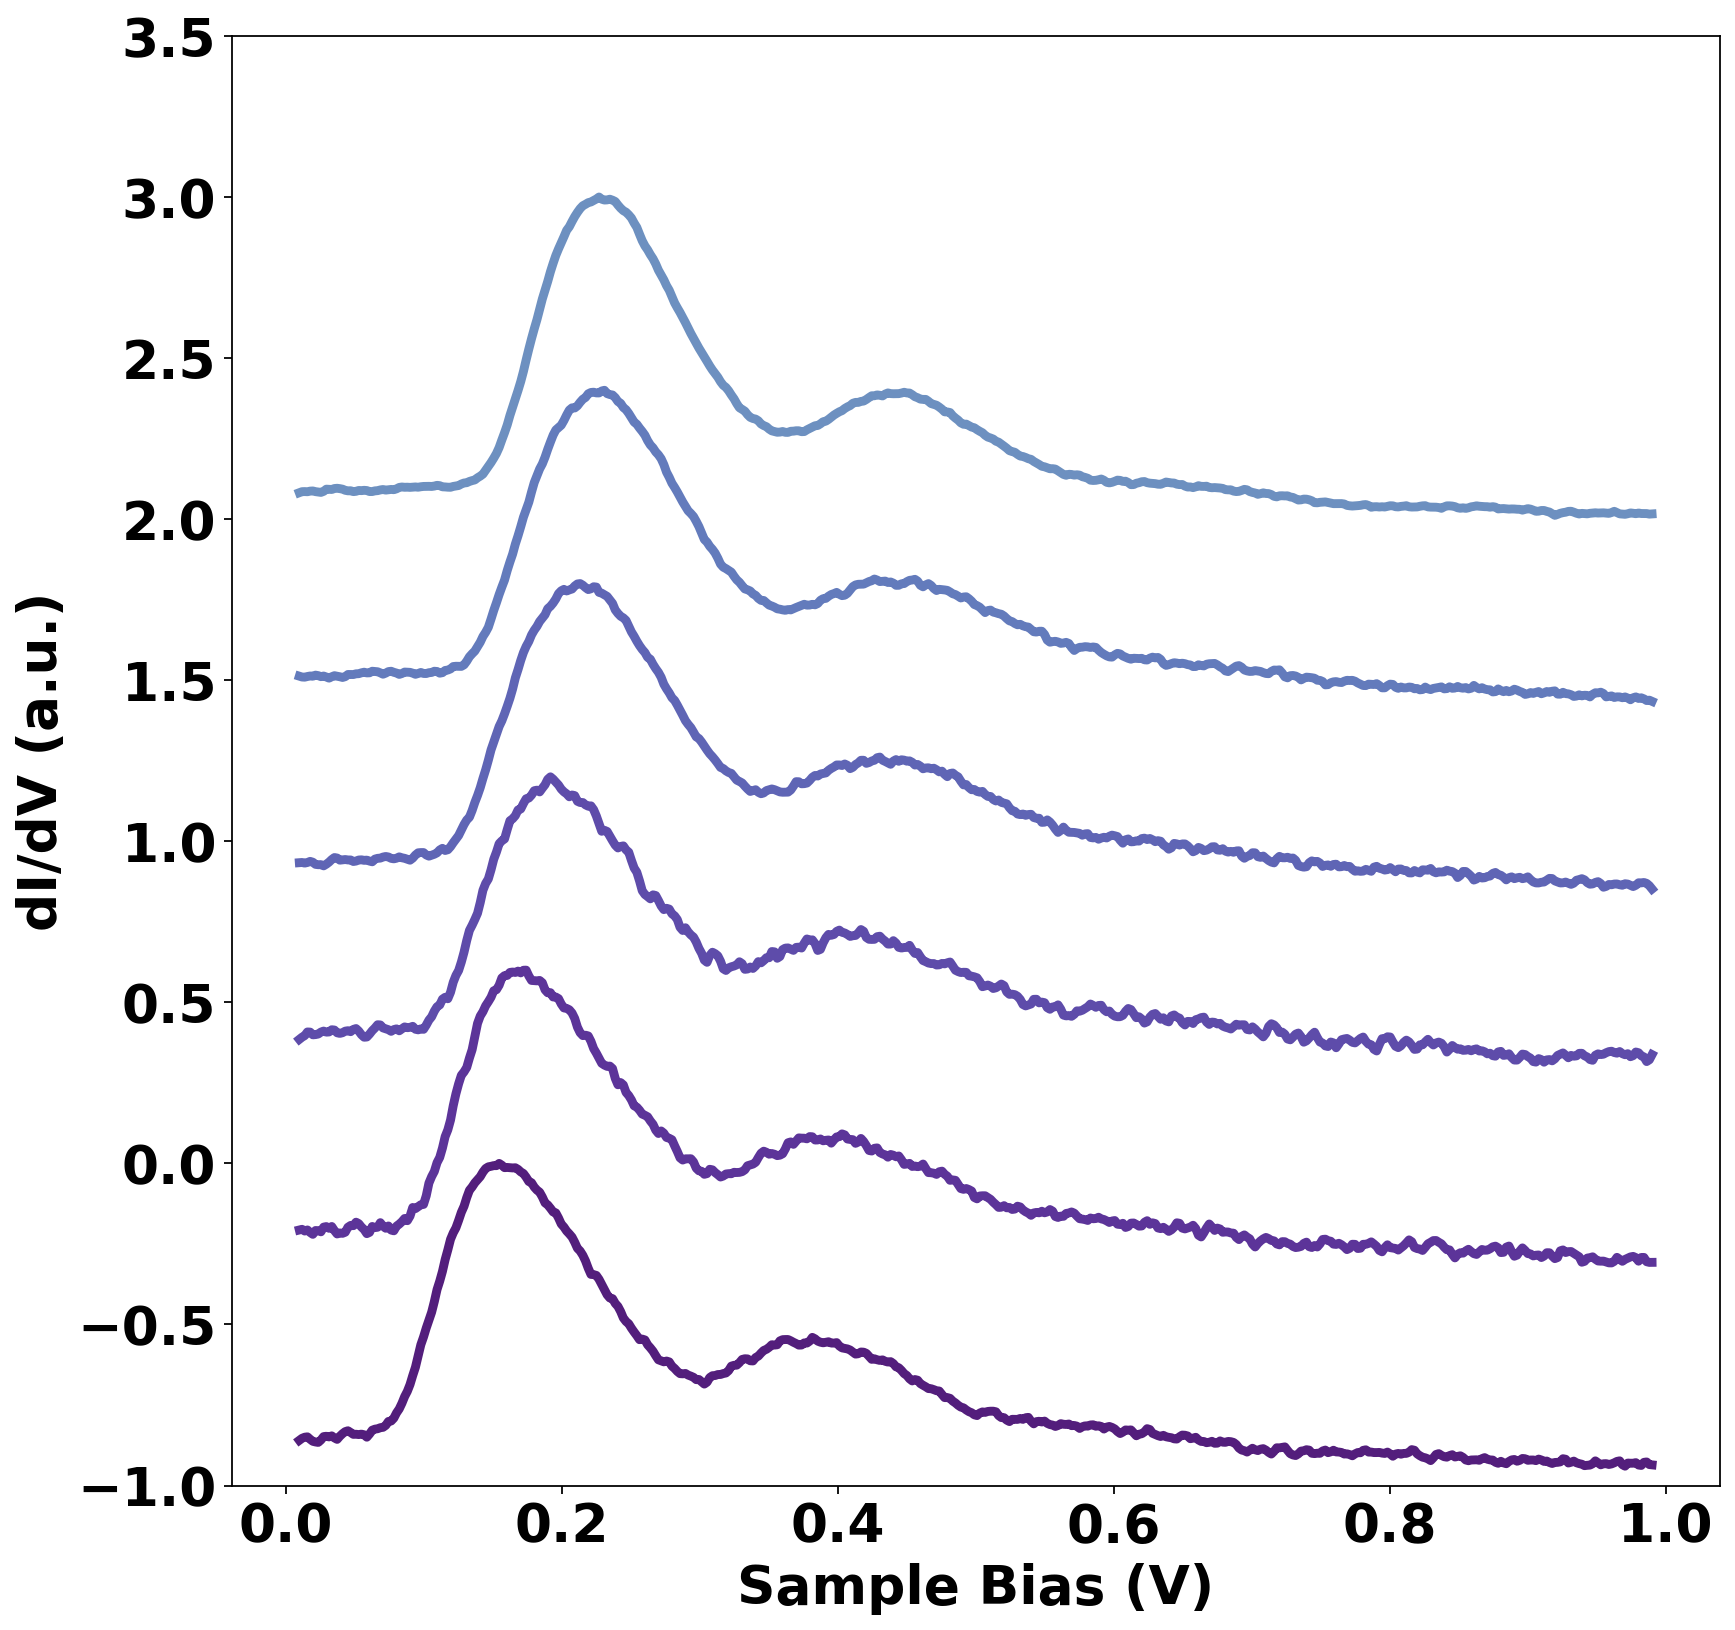

In [133]:
import math
import warnings
from scipy.signal import fftconvolve, gaussian
warnings.filterwarnings("ignore")
fig = plt.figure(num=None, figsize=(12, 12), dpi=160)
ax = fig.add_subplot(111)
# plt.title(PATH + str(N_RANGE[0]) + ".dat to " + str(N_RANGE[1] - 1))
i = 0
j = 0
col = plt.cm.twilight(np.linspace(0, 1, 101)) 
for file, _ in zip(files, volts):
    with open(file,'r') as f:
        for i in range(70): # 70 for .dat, 8 for transport__.dat
            next(f) # skip first row
        df = pd.read_table(f)
        df = df.astype('float64')
        df['LI Y [AVG] (V)'] = fftconvolve(df['LI Y [AVG] (V)'], gaussian(11, std=1), mode='same')
        df['LI Y [AVG] (V)'] = (df['LI Y [AVG] (V)'] - np.min(df['LI Y [AVG] (V)'])) / (np.max(df['LI Y [AVG] (V)']) - np.min(df['LI Y [AVG] (V)']))
        df['LI Y [AVG] (V)'] -= j * 0.6 - 2
        df = df.iloc[5:-5]
#         df = df[(df["Bias calc (V)"] > -0.5) & (df["Bias calc (V)"]  < 0.5)]
        col_j = math.floor((volts[j] - (-60)) / (60 - (-60)) * 100 * 0.5) + 20
        print(col_j)
        if "LI Y [AVG] (V)" in df.keys():
#             ax = sns.lineplot('Bias calc (V)', 'LI Y [AVG] (V)', data=df, lw=0.75, label=names[j], color=col[col_j], ax=ax)
            ax = sns.lineplot('Bias calc (V)', 'LI Y [AVG] (V)', data=df, lw=4, color=col[col_j], ax=ax, alpha=1)
        else:
#             ax = sns.lineplot('Bias calc (V)', 'LI Y (V)', data=df, lw=0.75, label=names[j], color=col[col_j], ax=ax)
            ax = sns.lineplot('Bias calc (V)', 'LI Y (V)', data=df, lw=4, ax=ax, alpha=0.5)

#         cbaxes = fig.add_axes([0.9, 0.1, 0.03, 0.8])
#         cb1 = mpl.colorbar.ColorbarBase(cbaxes, cmap=cmap, norm=norm, orientation='vertical')
#         cb1.set_label('Gate Voltage')
        j += 1
plt.xlabel("Sample Bias (V)", fontdict=font)
plt.ylabel("dI/dV (a.u.)", fontdict=font)
plt.ylim(-1.0, 3.5)
plt.savefig("fig3a.svg")